# K-mean on the clean Data

## Preprocessing

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [30]:
df = pd.read_csv('K_clean_data.csv')
df

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Badoo,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
0,0,2,0,2,0,0,2,3,3,3,...,0,0,0,0,0,0,1,1,0,1
1,0,2,1,1,0,2,1,3,1,2,...,0,2,1,1,0,0,0,0,1,1
2,0,2,1,1,0,0,1,2,1,3,...,0,1,1,0,0,0,1,1,1,0
3,2,2,1,1,2,2,1,3,4,1,...,0,1,0,0,0,0,1,0,0,1
4,0,2,0,2,2,2,2,2,3,5,...,0,2,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,1,1,2,2,2,3,2,3,...,0,3,1,0,0,0,0,0,0,1
408,2,2,0,2,2,2,3,3,4,4,...,0,0,0,0,0,1,1,0,0,1
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,1,0,0,0,0,1,1
410,0,2,0,3,0,0,3,4,2,2,...,0,0,0,0,0,1,1,0,0,0


In [31]:
cor_mat_df = df[['Age','Gender','Kukumbo?']]
corr_matrix = cor_mat_df.corr(method='pearson')
corr_matrix.where(corr_matrix > 0.1, None)

,Age,Gender,Kukumbo?
Age,1,0.103833,None
Gender,0.103833,1,None
Kukumbo?,None,None,1


<AxesSubplot:>

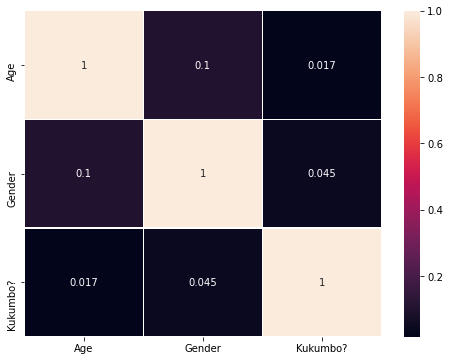

In [32]:
sns.heatmap(corr_matrix, annot=True, linewidths=0.2)

In [33]:
df.columns

Index(['Location', 'Age', 'Gender', 'Interested_in', 'Current_status',
       'Usually', 'Confidence', 'Bars', 'Social_network', 'Dating apps',
       'Through_a_friend', 'Street', 'experience', 'frequently_use', 'paid',
       'swipes_are', 'look_for_Short_term', 'look_for_Long_term', 'Tinder',
       'Bumble', 'OkCupid', 'Grinder', 'Hinge', 'Atraf', 'Badoo', 'num_apps',
       'use_for_Long_term', 'use_for_Short_term', 'use_for_Friends',
       'affraid_bad_people', 'not_seen_there', 'too_much_not_myType',
       'cannot_find_somebody_I_like', 'Kukumbo?'],
      dtype='object')

In [36]:
df['Interesdet_in_women'] = [1 if x == 1 else 0 for x in df['Interested_in']]
df['Interesdet_in_men'] = [1 if x == 2 else 0 for x in df['Interested_in']]
df['Interesdet_in_both'] = [1 if x == 3 else 0 for x in df['Interested_in']]

df['Cur_in_relationship'] = [1 if x == 0 else 0 for x in df['Current_status']]
df['Cur_in_open'] = [1 if x == 1 else 0 for x in df['Current_status']]
df['Cur_single'] = [1 if x == 2 else 0 for x in df['Current_status']]

df['Usual_in_relationship'] = [1 if x == 0 else 0 for x in df['Usually']]
df['Usual_in_open'] = [1 if x == 1 else 0 for x in df['Usually']]
df['Usual_single'] = [1 if x == 2 else 0 for x in df['Usually']]

cols_to_drop = ['Interested_in', 'Current_status','Usually']
df = df.drop(columns=cols_to_drop)
df

,Location,Age,Gender,Confidence,Bars,Social_network,Dating apps,Through_a_friend,Street,experience,...,Interesdet_in_women,Interesdet_in_men,Interesdet_in_both,In_relationship,Cur_in_relationship,Cur_in_open,Cur_single,Usual_in_relationship,Usual_in_open,Usual_single
0,0,2,0,2,3,3,3,3,3,0,...,0,1,0,1,1,0,0,1,0,0
1,0,2,1,1,3,1,2,5,4,3,...,1,0,0,1,1,0,0,0,0,1
2,0,2,1,1,2,1,3,5,3,3,...,1,0,0,1,1,0,0,1,0,0
3,2,2,1,1,3,4,1,3,2,2,...,1,0,0,0,0,0,1,0,0,1
4,0,2,0,2,2,3,5,3,2,4,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,1,2,3,2,3,5,4,3,...,1,0,0,0,0,0,1,0,0,1
408,2,2,0,3,3,4,4,1,2,0,...,0,1,0,0,0,0,1,0,0,1
409,0,2,0,1,4,3,1,4,3,2,...,0,1,0,0,0,0,1,0,0,1
410,0,2,0,3,4,2,2,4,1,0,...,0,0,1,1,1,0,0,1,0,0


In [35]:
df

,Location,Age,Gender,Interested_in,Current_status,Usually,Confidence,Bars,Social_network,Dating apps,...,Interesdet_in_women,Interesdet_in_men,Interesdet_in_both,In_relationship,Cur_in_relationship,Cur_in_open,Cur_single,Usual_in_relationship,Usual_in_open,Usual_single
0,0,2,0,2,0,0,2,3,3,3,...,0,1,0,1,1,0,0,1,0,0
1,0,2,1,1,0,2,1,3,1,2,...,1,0,0,1,1,0,0,0,0,1
2,0,2,1,1,0,0,1,2,1,3,...,1,0,0,1,1,0,0,1,0,0
3,2,2,1,1,2,2,1,3,4,1,...,1,0,0,0,0,0,1,0,0,1
4,0,2,0,2,2,2,2,2,3,5,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0,2,1,1,2,2,2,3,2,3,...,1,0,0,0,0,0,1,0,0,1
408,2,2,0,2,2,2,3,3,4,4,...,0,1,0,0,0,0,1,0,0,1
409,0,2,0,2,2,2,1,4,3,1,...,0,1,0,0,0,0,1,0,0,1
410,0,2,0,3,0,0,3,4,2,2,...,0,0,1,1,1,0,0,1,0,0


In [13]:
cols_to_drop = ['Location', 'Current_status','Usually','Tinder','Bumble','OkCupid','Grinder','Hinge','Atraf','Badoo',]
df = df.drop(columns=cols_to_drop)
df

,Age,Gender,Interested_in,Confidence,Bars,Social_network,Dating apps,Through_a_friend,Street,experience,...,look_for_Long_term,num_apps,use_for_Long_term,use_for_Short_term,use_for_Friends,affraid_bad_people,not_seen_there,too_much_not_myType,cannot_find_somebody_I_like,Kukumbo?
0,2,0,2,2,3,3,3,3,3,0,...,1,0,0,0,0,0,1,1,0,1
1,2,1,1,1,3,1,2,5,4,3,...,1,2,1,1,0,0,0,0,1,1
2,2,1,1,1,2,1,3,5,3,3,...,1,1,1,0,0,0,1,1,1,0
3,2,1,1,1,3,4,1,3,2,2,...,1,1,0,0,0,0,1,0,0,1
4,2,0,2,2,2,3,5,3,2,4,...,1,2,0,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,2,1,1,2,3,2,3,5,4,3,...,1,3,1,0,0,0,0,0,0,1
408,2,0,2,3,3,4,4,1,2,0,...,1,0,0,0,0,1,1,0,0,1
409,2,0,2,1,4,3,1,4,3,2,...,1,1,0,1,0,0,0,0,1,1
410,2,0,3,3,4,2,2,4,1,0,...,0,0,0,0,0,1,1,0,0,0


## K-means

In [13]:
def create_kmeans_classifier(k):
    try:
        val = int(k)
        if val >= 1 and val == k:
            pass
        else:
            print("k must be an integer, greater than 1")
            return
    except ValueError:
        print("Amount must be a number, try again")
    
    # all good
    return KMeans(n_clusters=k)

In [ ]:
cols_not_to_norm = ['Age', 'Confidence','Bars','Social_network','Dating apps','Through_a_friend','Street','experience',
                    'frequently_use','paid','num_apps']
cols_to_norm = list(df2.columns.drop(cols_not_to_norm))
X = df2.copy()
X[cols_to_norm] = X_normalize[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X.describe()

In [14]:
sse = []
sil = []
k_range = range(2,7)
for k in k_range:
    clf = create_kmeans_classifier(k)
    preds = clf.fit_predict(X_normalize)
    sse.append(clf.inertia_)
    sil.append(silhouette_score(X, preds, metric=distance_metric))

ValueError: could not convert string to float: 'Jerusalm and around'

In [ ]:
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE VS k')
plt.show()

In [ ]:
plt.plot(k_range, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette VS k')
plt.show()